Gần đây tôi đã dành một lượng thời gian khá lớn để học Python, nhưng hầu hết những nỗ lực của tôi đã tập trung vào mô-đun đồ họa rùa. Điều đó thật thú vị và một số hình ảnh tôi có thể tạo ra khá thú vị (ít nhất là với tôi), nhưng điều tôi thực sự muốn làm là học cách làm mọi thứ với âm thanh. Vì vậy, tôi đã bắt đầu học DSP. Tôi khá dễ hiểu với các hàm liên tục, nhưng các hàm rời rạc lúc đầu có thể là một thách thức - chỉ mục, ý nghĩa của tần số và thời gian, v.v. Với một thực tế nhỏ - đó là tất cả bài đăng này - nó trở nên rõ ràng khá nhanh . Trên đường đi, tôi nhận được một số âm mưu thực hành với Matplotlib, Numpy và Scipy. Thứ tự đầu tiên của kinh doanh, tôi muốn hiểu thế hệ hình sin. Phương trình cơ bản là:

x ( t ) = A c o s ( 2 πft + φ )
Dưới đây là sơ đồ hình sin 5 Hz với độ trễ pha là pi / 4 radian

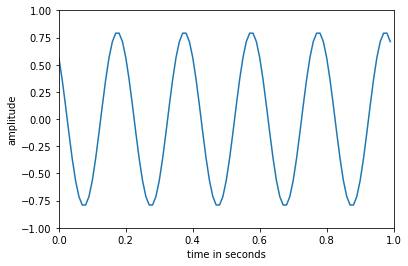

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
A = .8
f = 5
t = np.arange(0,1,.01)
phi = np.pi/4
x = A*np.cos(2*np.pi*f*t + phi)
plt.plot(t,x)
plt.axis([0,1,-1,1])
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.show()

rên đây là một mẫu được lấy mẫu theo nghĩa đen, theo đó nó dựa trên một mảng có độ dài 100 với mỗi phần tử cách nhau 0,01.

Để căn cứ vào mẫu một cách rõ ràng, bạn có thể sử dụng một trong hai biểu thức:

x = A c o s ( 2 πfn T+ Φ ), trong đó n là chỉ số mẫu và T là khoảng thời gian mẫu, hoặc

x = A c o s ( 2 πfn / N+ Φ ), trong đó n là chỉ số mẫu và N là số lượng mẫu.

x = A c o s ( 2 πfn T+ Φ )

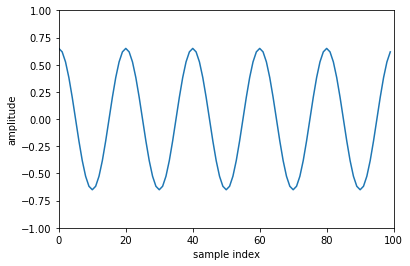

In [2]:
A = .65
fs = 100
samples = 100
f = 5
phi = 0
n = np.arange(samples)
T = 1.0/fs # Remember to use 1.0 and not 1!
y = A*np.cos(2*np.pi*f*n*T + phi)
plt.plot(y)
plt.axis([0,100,-1,1])
plt.xlabel('sample index')
plt.ylabel('amplitude')
plt.show()

x = A c o s ( 2 πfn / N+ Φ ) là thời gian độc lập của thành phố, thời gian đó phụ thuộc vào tốc độ mẫu hoặc thực sự dựa trên thời gian của tốc độ mẫu. Vì vậy, nếu tỷ lệ mẫu của bạn là 100 mẫu mỗi ngày và f = 5, tần suất của bạn sẽ là 5 chu kỳ mỗi ngày.

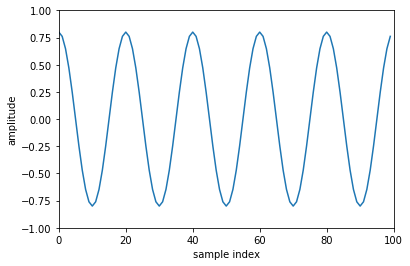

In [3]:
A = .8
N = 100 # samples
f = 5
phi = 0
n = np.arange(N)
y = A*np.cos(2*np.pi*f*n/N + phi)
plt.plot(y)
plt.axis([0,100,-1,1])
plt.xlabel('sample index')
plt.ylabel('amplitude')
plt.show()

Các hình sin phức tạp có dạng:

ej ( 2 πft + φ )= c o s ( 2 πft ) + j s i n ( 2 πft )cho thời gian liên tục và x = ej ( 2 πfn T+ Φ )cho rời rạc. Rời khỏi thuật ngữ biên độ, đây là phiên bản liên tục, với thành phần ảo được hiển thị bằng màu xanh lá cây

In [4]:
f = 3
t = np.arange(0,1,.01)
phi = 0
x = np.exp(1j*(2*np.pi*f*t + phi))
xim = np.imag(x)
plt.figure(1)
plt.plot(t,np.real(x))
plt.plot(t,xim)
plt.axis([0,1,-1.1,1.1])
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.show()

Phiên bản rời rạc = ej ( 2 πfn T+ Φ )

In [5]:
f = 3
N = 100
fs = 100
n = np.arange(N)
T = 1.0/fs
t = N*T
phi = 0
x = np.exp(1j*(2*np.pi*f*n*T + phi))
xim = np.imag(x)
plt.figure(1)
plt.plot(n*T,np.real(x))
plt.plot(n*T,xim)
plt.axis([0,t,-1.1,1.1])
plt.xlabel('t(seconds)')
plt.ylabel('amplitude')
plt.show()

Bạn cũng có thể làm điều đó dựa trên = ej ( 2 πfn / N+ Φ ).

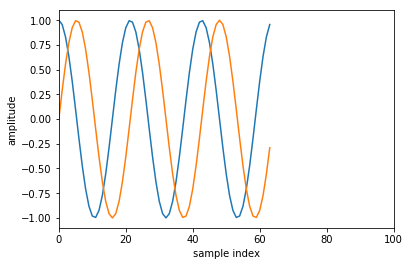

In [6]:
f = 3
N = 64 
n = np.arange(64)
phi = 0
x = np.exp(1j*(2*np.pi*f*n/N + phi))
xim = np.imag(x)
plt.figure(1)
plt.plot(n,np.real(x))
plt.plot(n,xim)
plt.axis([0,samples,-1.1,1.1])
plt.xlabel('sample index')
plt.ylabel('amplitude')
plt.show()

Cuối cùng, bạn có thể sử dụng Scipy để ghi dữ liệu vào tệp .wav - đây là 1 giây ở 440 Hz

In [7]:
N = 44100 # samples
f = 440
fs = 44100
phi = 0
n = np.arange(N)
x = A*np.cos(2*np.pi*f*n/N + phi)
#scipy.io.wavfile.write(filename, rate, data)[source]
from scipy.io.wavfile import write
write('sine440_1sec.wav', 44100, x)